<a href="https://colab.research.google.com/github/cvrl10/MLA_CPA/blob/main/MLA5_CPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 5**

**CS430-ON**

**Machine Learning in the Cloud**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Imports for specific models

In [9]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

##Imports for Splitting Data and Building Pipeline

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

##Imports for Performance Measures

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

##Acquire Data

In [12]:
landsat_train, landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/Module5/landsat_train.csv'), pd.read_csv('/content/gdrive/MyDrive/CS430/Module5/landsat_test.csv')

In [13]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [14]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


##Statistics and Visual Exploration

In [15]:
landsat_train_grouping = landsat_train['land_type'].groupby(landsat_train['land_type']).count()
landsat_test_grouping = landsat_test['land_type'].groupby(landsat_test['land_type']).count()

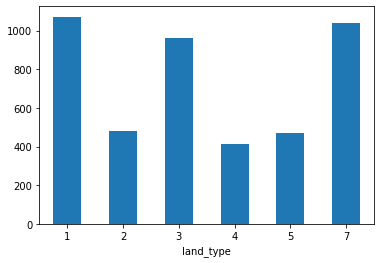

In [16]:
landsat_train_grouping.plot(kind='bar', rot=0)

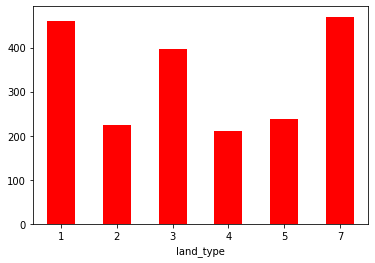

In [17]:
landsat_test_grouping.plot(kind='bar', rot=0, color='red')

##Splitting Data into Train/Test

In [18]:
X_train = landsat_train.iloc[:, :-1]
X_test = landsat_test.iloc[:, :-1]

y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

##Building the Pipeline

In [19]:
num_attributes = list(landsat_train.columns[:-1])

col_transform = ColumnTransformer([
                                  ('num', MinMaxScaler(), num_attributes),
                            ])

In [20]:
pipeline = Pipeline([
                    ('transfomer', col_transform),
                    ('rf', RandomForestClassifier(n_estimators=1000, max_samples=1000, bootstrap=True))
])

##Executing the Model

In [21]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transfomer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=1000, n_estimators=1000))])

##Evaluating the Model

In [22]:
y_pred = pipeline.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       461
           2       0.98      0.97      0.98       224
           3       0.86      0.95      0.90       397
           4       0.74      0.60      0.66       211
           5       0.91      0.81      0.86       237
           7       0.85      0.88      0.86       470

    accuracy                           0.89      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.89      0.89      0.89      2000



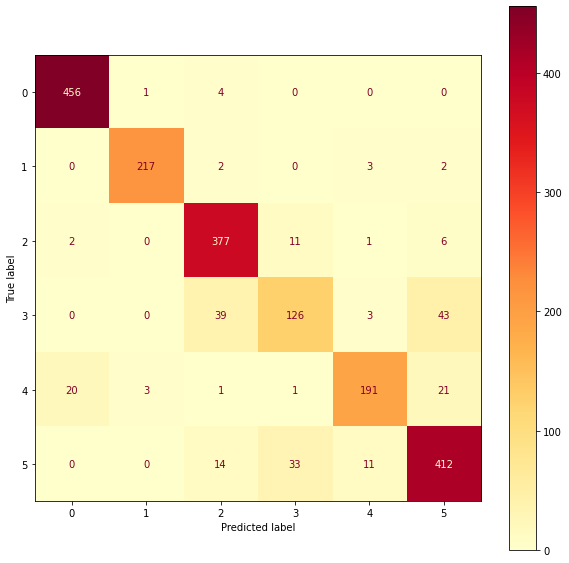

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

##Conclusion
This model does a poor a job with classification 4, which kind of make sense intuitively since it’s the class with the fewest instances to train on. The model does a great job overall at predicting the classes that had the most instances to be trained on, in other words the classes that shows up the most in the dataset. We can say that this model is suitable for predicting land type accurately expect for land type 4 but this can be remedied with more instance of land type 4 introduced into the dataset and retraining the model.

##**Problem 2**

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=100_000)
svc = SVC(kernel='rbf')

##Building the Pipeline

In [26]:
pipeline = Pipeline([
                    ('transformer', col_transform),
                    ('voting_ensemble', VotingClassifier(estimators=[('knn', knn),
                                                                     ('lr', lr),
                                                                     ('svc', svc)]))
      ])

##Executing the Model

In [27]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_...
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

##Evaluating the Model

In [28]:
y_pred = pipeline.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.87      0.97      0.91       397
           4       0.71      0.55      0.62       211
           5       0.91      0.86      0.89       237
           7       0.84      0.86      0.85       470

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



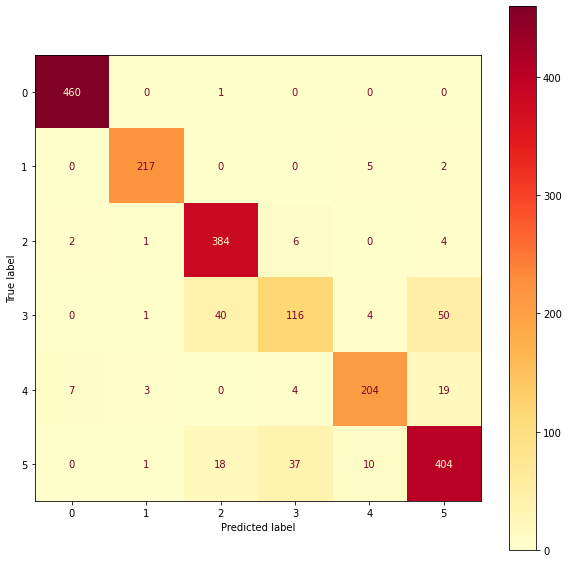

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

##Conclusion
This model is equally as good as the previous model, we’ve come to the same conclusion that the model does poorly for class 4 due to the model having only a few instances to train on. When it comes to the other classes, the model does a fairly good at predicting their instances.

##**Problem 3**

##Acquire Data

In [36]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Module3/banknote_authentication.csv')

In [37]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


##Splitting Data into Train/Test

In [50]:
input_columns = list(df.columns[:-1])

X = df[input_columns]
y = df['forgery']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

##Building the Pipeline

In [48]:
num_attributes = input_columns

col_transform = ColumnTransformer([
                                  ('num', MinMaxScaler(), num_attributes),
                            ])

In [44]:
len(df)

1372

In [45]:
pipeline = Pipeline([
                    ('transfomer', col_transform),
                    ('rf', RandomForestClassifier(n_estimators=1000, max_samples=500, bootstrap=True))
    ])

##Executing the Model

In [52]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transfomer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000))])

##Evaluating the Model

In [53]:
y_pred = pipeline.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       0.98      1.00      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



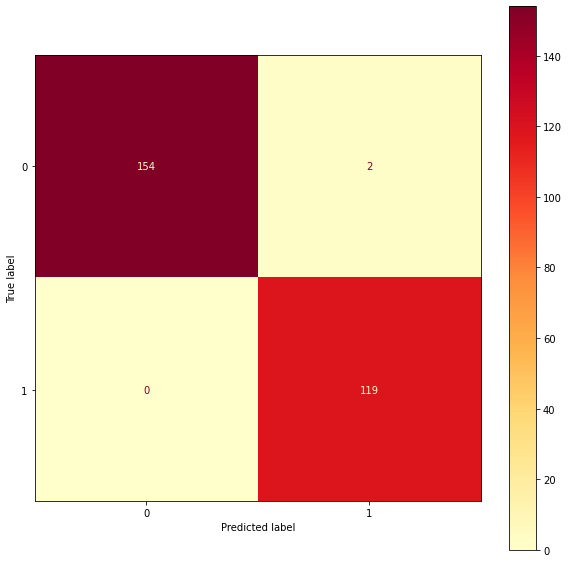

In [55]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

##Conclusion
This model does an excellent job at predicting authentic banknotes from forgeries, it has a high precision when it comes to both the positive and negative class and the recalls for the negative class is at 0.99 while the recall for the positive class is at good as it gets with a score of 1.00. The model only mislabeled two instances, which is a good sign that it is an excellent predictor.